In [27]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from zipfile import ZipFile
import datetime
import seaborn as sns


In [28]:
z = ZipFile('tandem_data_20240423T061414Z_001.zip')

text_files = z.infolist()

for text_file in text_files:
    z.read(text_file.filename)

In [29]:
# Read the entire dataset using pandas dataframe and build the file by appending each file in an optimized manner

df1 = pd.concat(
    [pd.read_csv(ZipFile('tandem_data_20240423T061414Z_001.zip').open(i)) for i in ZipFile('tandem_data_20240423T061414Z_001.zip').namelist()],
    ignore_index=True
)
df1.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,71766,2018-03-31 16:58:33.1490,2018-04-01 12:54:39.2630,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,341,Customer,1964.0,Female,No
1,62569,2018-03-31 19:03:35.9160,2018-04-01 12:26:25.0350,78.0,Folsom St at 9th St,37.773717,-122.411647,47.0,4th St at Harrison St,37.780955,-122.399749,536,Subscriber,1984.0,Male,No
2,56221,2018-03-31 20:13:13.5640,2018-04-01 11:50:14.8400,258.0,University Ave at Oxford St,37.872355,-122.266447,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,3245,Customer,1983.0,Male,No
3,85844,2018-03-31 11:28:07.6580,2018-04-01 11:18:52.6130,186.0,Lakeside Dr at 14th St,37.801319,-122.262642,340.0,Harmon St at Adeline St,37.849735,-122.270582,3722,Customer,NaN,NaN,No
4,1566,2018-03-31 23:37:56.6400,2018-04-01 00:04:02.8930,193.0,Grand Ave at Santa Clara Ave,37.812744,-122.247215,196.0,Grand Ave at Perkins St,37.808894,-122.256460,2355,Subscriber,1979.0,Male,No
5,281,2018-03-31 23:58:07.8050,2018-04-01 00:02:49.3590,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,200.0,2nd Ave at E 18th St,37.800214,-122.253810,777,Subscriber,1991.0,Male,No
6,896,2018-03-31 23:47:48.7970,2018-04-01 00:02:45.5380,98.0,Valencia St at 16th St,37.765052,-122.421866,52.0,McAllister St at Baker St,37.777416,-122.441838,3624,Customer,1970.0,Male,No
7,440,2018-03-31 23:51:17.8000,2018-03-31 23:58:38.7120,11.0,Davis St at Jackson St,37.797280,-122.398436,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,2410,Subscriber,1979.0,Female,Yes
8,169,2018-03-31 23:50:43.8140,2018-03-31 23:53:33.5710,316.0,San Salvador St at 1st St,37.330165,-121.885831,311.0,Paseo De San Antonio at 2nd St,37.333798,-121.886943,1925,Subscriber,1957.0,Male,No
9,2765,2018-03-31 23:03:50.0160,2018-03-31 23:49:55.3190,318.0,San Carlos St at Market St,37.330698,-121.888979,318.0,San Carlos St at Market St,37.330698,-121.888979,1191,Customer,1981.0,Male,No


In [30]:
df1.shape

(576102, 16)

In [31]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576102 entries, 0 to 576101
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             576102 non-null  int64  
 1   start_time               576102 non-null  object 
 2   end_time                 576102 non-null  object 
 3   start_station_id         572242 non-null  float64
 4   start_station_name       572242 non-null  object 
 5   start_station_latitude   576102 non-null  float64
 6   start_station_longitude  576102 non-null  float64
 7   end_station_id           572242 non-null  float64
 8   end_station_name         572242 non-null  object 
 9   end_station_latitude     576102 non-null  float64
 10  end_station_longitude    576102 non-null  float64
 11  bike_id                  576102 non-null  int64  
 12  user_type                576102 non-null  object 
 13  member_birth_year        544529 non-null  float64
 14  memb

In [32]:
# What was the time duration for the average trip taken? (Use plotting techniques and write your observations for the same.)
groupby_df = df1.groupby(['start_station_name', 'end_station_name'])

In [33]:
mean_avg = groupby_df['duration_sec'].sum() / groupby_df['duration_sec'].count()
means = pd.DataFrame(mean_avg)
means


duration_sec
start_station_name                                 end_station_name                                                
10th Ave at E 15th St                              10th Ave at E 15th St                                1822.600000
                                                   10th St at Fallon St                                  570.361111
                                                   12th St at 4th Ave                                    379.000000
                                                   12th St at 6th Ave                                   3406.500000
                                                   13th St at Franklin St                                896.800000
...                                                                                                             ...
Yerba Buena Center for the Arts (Howard St at 3... Victoria Manalo Draves Park                           353.972973
                                                   Washington St at Kearny St                            796.593750
                                                   Webster St at Grove St                               1076.740741
                                                   Webster St at O'Farrell St                           1259.555556
                                                   Yerba Buena Center for the Arts (Howard St at 3...   1829.637681

[29641 rows x 1 columns]

In [34]:
means.reset_index(inplace = True)
means

,start_station_name,end_station_name,duration_sec
0,10th Ave at E 15th St,10th Ave at E 15th St,1822.600000
1,10th Ave at E 15th St,10th St at Fallon St,570.361111
2,10th Ave at E 15th St,12th St at 4th Ave,379.000000
3,10th Ave at E 15th St,12th St at 6th Ave,3406.500000
4,10th Ave at E 15th St,13th St at Franklin St,896.800000
...,...,...,...
29636,Yerba Buena Center for the Arts (Howard St at ...,Victoria Manalo Draves Park,353.972973
29637,Yerba Buena Center for the Arts (Howard St at ...,Washington St at Kearny St,796.593750
29638,Yerba Buena Center for the Arts (Howard St at ...,Webster St at Grove St,1076.740741
29639,Yerba Buena Center for the Arts (Howard St at ...,Webster St at O'Farrell St,1259.555556


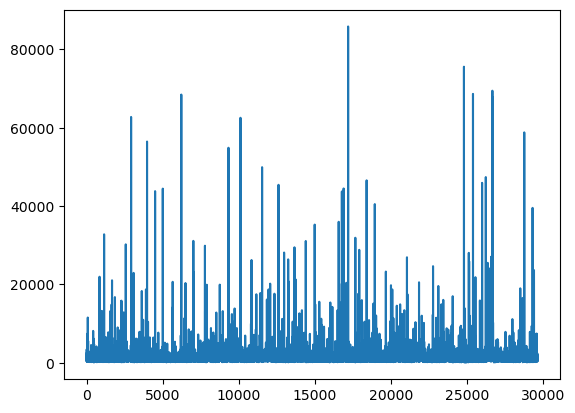

In [35]:
plt.plot(means['duration_sec'])

In [36]:
# Is there any correlation between the months and the trip duration? Use scatter plot and comment your observations from the plot

groupby_df1 = df1.groupby(['start_time'])




In [37]:
df1['start_time'] = pd.to_datetime(df1['start_time'], format='ISO8601') 

In [38]:
df1['start_time']

0        2018-03-31 16:58:33.149
1        2018-03-31 19:03:35.916
2        2018-03-31 20:13:13.564
3        2018-03-31 11:28:07.658
4        2018-03-31 23:37:56.640
                   ...          
576097   2018-11-01 00:06:57.844
576098   2018-11-01 00:05:22.516
576099   2018-11-01 00:04:20.937
576100   2018-11-01 00:03:04.848
576101   2018-11-01 00:03:25.336
Name: start_time, Length: 576102, dtype: datetime64[ns]

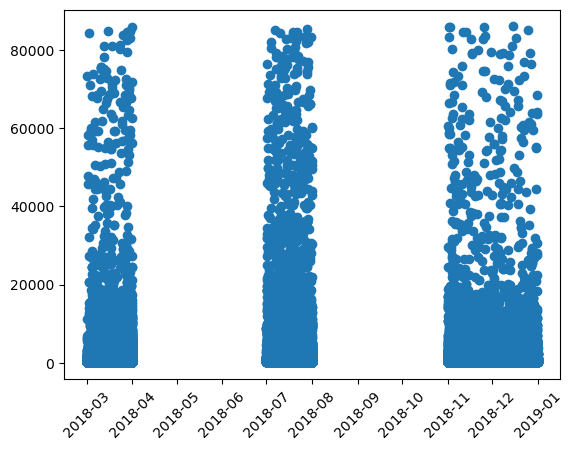

In [39]:

plt.scatter(df1['start_time'], df1['duration_sec'])
plt.xticks(rotation = 45);


In [40]:
# Do seasons affect the duration of a trip ? Comment your observations.


In [41]:
df1

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,71766,2018-03-31 16:58:33.149,2018-04-01 12:54:39.2630,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,341,Customer,1964.0,Female,No
1,62569,2018-03-31 19:03:35.916,2018-04-01 12:26:25.0350,78.0,Folsom St at 9th St,37.773717,-122.411647,47.0,4th St at Harrison St,37.780955,-122.399749,536,Subscriber,1984.0,Male,No
2,56221,2018-03-31 20:13:13.564,2018-04-01 11:50:14.8400,258.0,University Ave at Oxford St,37.872355,-122.266447,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,3245,Customer,1983.0,Male,No
3,85844,2018-03-31 11:28:07.658,2018-04-01 11:18:52.6130,186.0,Lakeside Dr at 14th St,37.801319,-122.262642,340.0,Harmon St at Adeline St,37.849735,-122.270582,3722,Customer,NaN,NaN,No
4,1566,2018-03-31 23:37:56.640,2018-04-01 00:04:02.8930,193.0,Grand Ave at Santa Clara Ave,37.812744,-122.247215,196.0,Grand Ave at Perkins St,37.808894,-122.256460,2355,Subscriber,1979.0,Male,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576097,197,2018-11-01 00:06:57.844,2018-11-01 00:10:15.1550,59.0,S Van Ness Ave at Market St,37.774814,-122.418954,76.0,McCoppin St at Valencia St,37.771662,-122.422423,1860,Subscriber,1970.0,Male,Yes
576098,267,2018-11-01 00:05:22.516,2018-11-01 00:09:49.9650,179.0,Telegraph Ave at 27th St,37.816073,-122.267886,215.0,34th St at Telegraph Ave,37.822547,-122.266318,3028,Subscriber,1977.0,Male,No
576099,317,2018-11-01 00:04:20.937,2018-11-01 00:09:38.7410,368.0,Myrtle St at Polk St,37.785434,-122.419622,61.0,Howard St at 8th St,37.776513,-122.411306,3139,Subscriber,1990.0,Male,No
576100,371,2018-11-01 00:03:04.848,2018-11-01 00:09:16.1500,368.0,Myrtle St at Polk St,37.785434,-122.419622,77.0,11th St at Natoma St,37.773507,-122.416040,1321,Subscriber,1991.0,Male,No


In [42]:
df1['Month'] = df1['start_time'].dt.strftime('%m')

In [43]:
df1

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Month
0,71766,2018-03-31 16:58:33.149,2018-04-01 12:54:39.2630,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,341,Customer,1964.0,Female,No,03
1,62569,2018-03-31 19:03:35.916,2018-04-01 12:26:25.0350,78.0,Folsom St at 9th St,37.773717,-122.411647,47.0,4th St at Harrison St,37.780955,-122.399749,536,Subscriber,1984.0,Male,No,03
2,56221,2018-03-31 20:13:13.564,2018-04-01 11:50:14.8400,258.0,University Ave at Oxford St,37.872355,-122.266447,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,3245,Customer,1983.0,Male,No,03
3,85844,2018-03-31 11:28:07.658,2018-04-01 11:18:52.6130,186.0,Lakeside Dr at 14th St,37.801319,-122.262642,340.0,Harmon St at Adeline St,37.849735,-122.270582,3722,Customer,NaN,NaN,No,03
4,1566,2018-03-31 23:37:56.640,2018-04-01 00:04:02.8930,193.0,Grand Ave at Santa Clara Ave,37.812744,-122.247215,196.0,Grand Ave at Perkins St,37.808894,-122.256460,2355,Subscriber,1979.0,Male,No,03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576097,197,2018-11-01 00:06:57.844,2018-11-01 00:10:15.1550,59.0,S Van Ness Ave at Market St,37.774814,-122.418954,76.0,McCoppin St at Valencia St,37.771662,-122.422423,1860,Subscriber,1970.0,Male,Yes,11
576098,267,2018-11-01 00:05:22.516,2018-11-01 00:09:49.9650,179.0,Telegraph Ave at 27th St,37.816073,-122.267886,215.0,34th St at Telegraph Ave,37.822547,-122.266318,3028,Subscriber,1977.0,Male,No,11
576099,317,2018-11-01 00:04:20.937,2018-11-01 00:09:38.7410,368.0,Myrtle St at Polk St,37.785434,-122.419622,61.0,Howard St at 8th St,37.776513,-122.411306,3139,Subscriber,1990.0,Male,No,11
576100,371,2018-11-01 00:03:04.848,2018-11-01 00:09:16.1500,368.0,Myrtle St at Polk St,37.785434,-122.419622,77.0,11th St at Natoma St,37.773507,-122.416040,1321,Subscriber,1991.0,Male,No,11


In [44]:
df1.set_index(['start_time', 'end_time'], inplace=True)

In [45]:
df1['Seasons'] = df1.apply(lambda x : 'Winter' if x['Month'] in ['12','11','10','01']  else 'summer' if x['Month'] in['02','03','04','05'] else  'Rain', axis=1)


In [21]:
df1

,,duration_sec,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Month,Seasons
start_time,end_time,,,,,,,,,,,,,,,,
2018-03-31 16:58:33.149,2018-04-01 12:54:39.2630,71766,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,341,Customer,1964.0,Female,No,03,summer
2018-03-31 19:03:35.916,2018-04-01 12:26:25.0350,62569,78.0,Folsom St at 9th St,37.773717,-122.411647,47.0,4th St at Harrison St,37.780955,-122.399749,536,Subscriber,1984.0,Male,No,03,summer
2018-03-31 20:13:13.564,2018-04-01 11:50:14.8400,56221,258.0,University Ave at Oxford St,37.872355,-122.266447,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,3245,Customer,1983.0,Male,No,03,summer
2018-03-31 11:28:07.658,2018-04-01 11:18:52.6130,85844,186.0,Lakeside Dr at 14th St,37.801319,-122.262642,340.0,Harmon St at Adeline St,37.849735,-122.270582,3722,Customer,NaN,NaN,No,03,summer
2018-03-31 23:37:56.640,2018-04-01 00:04:02.8930,1566,193.0,Grand Ave at Santa Clara Ave,37.812744,-122.247215,196.0,Grand Ave at Perkins St,37.808894,-122.256460,2355,Subscriber,1979.0,Male,No,03,summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-01 00:06:57.844,2018-11-01 00:10:15.1550,197,59.0,S Van Ness Ave at Market St,37.774814,-122.418954,76.0,McCoppin St at Valencia St,37.771662,-122.422423,1860,Subscriber,1970.0,Male,Yes,11,Winter
2018-11-01 00:05:22.516,2018-11-01 00:09:49.9650,267,179.0,Telegraph Ave at 27th St,37.816073,-122.267886,215.0,34th St at Telegraph Ave,37.822547,-122.266318,3028,Subscriber,1977.0,Male,No,11,Winter
2018-11-01 00:04:20.937,2018-11-01 00:09:38.7410,317,368.0,Myrtle St at Polk St,37.785434,-122.419622,61.0,Howard St at 8th St,37.776513,-122.411306,3139,Subscriber,1990.0,Male,No,11,Winter


In [46]:
grp_by_mnth = df1.groupby('Seasons')

In [47]:
grp_by_mnth['duration_sec'].sum()

Seasons
Rain      180835919
Winter    202906392
summer     96974727
Name: duration_sec, dtype: int64

 From the above data we can clearly see that there is a clear that seasons do affect trip durations, in winter we have more of trips happening and summer has less number of trips

In [48]:
#Using multivariate exploration, explain whether there is any relation between short trips and the users.

user_grp = df1.groupby('user_type')
sum_dur = user_grp['duration_sec'].sum()

In [56]:
sum_dur = sum_dur.reset_index()

In [57]:
sum_dur

,user_type,duration_sec
0,Customer,154816733
1,Subscriber,325900305


In [51]:
#user_grp.plot('user_type', 'duration_sec')

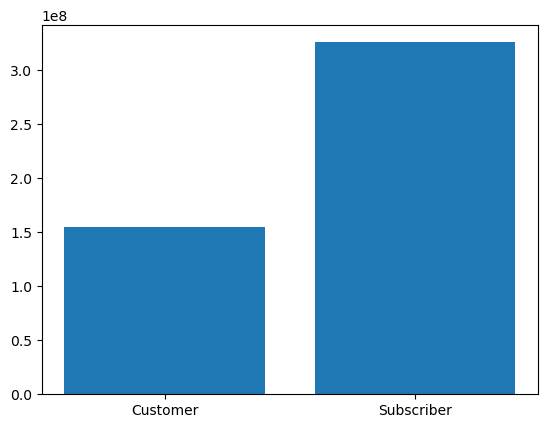

In [59]:
plt.bar(sum_dur['user_type'], sum_dur['duration_sec'])
plt.show()

In [74]:
# a. Create a Matrix between 0 and 1, with each value difference of 0.01.
r = np.random.rand(3,5)

In [81]:
arr = np.matrix(r)
arr

matrix([[3.46719663e-01, 3.05108564e-01, 9.93883006e-01, 3.47310858e-01,
         2.92089302e-01],
        [3.80456851e-01, 6.09847651e-01, 8.69019267e-01, 4.56862468e-01,
         6.79881822e-01],
        [1.03115853e-04, 2.36592236e-01, 4.16242455e-01, 9.49920580e-01,
         4.53268288e-01]])

In [83]:
# Create an array of 20 linearly spaced points between 0 and 1.
linear_space= np.linspace(0,1,5)
linear_space

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [90]:
# Create a 5*5 matrix using range 1 to 26, and return sum of the matrix, standard deviation and sum of all the columns of the matrix.
arr = np.random.randint(1,27, size=(3, 5))

In [93]:
mat = np.matrix(arr)
mat

matrix([[11,  8,  2, 16,  6],
        [14, 12,  1, 17, 21],
        [13,  9, 13,  2, 15]])

# Question 3

In [94]:
import numpy as np
x = np.arange(0,100)
y = x*2
z = x**2

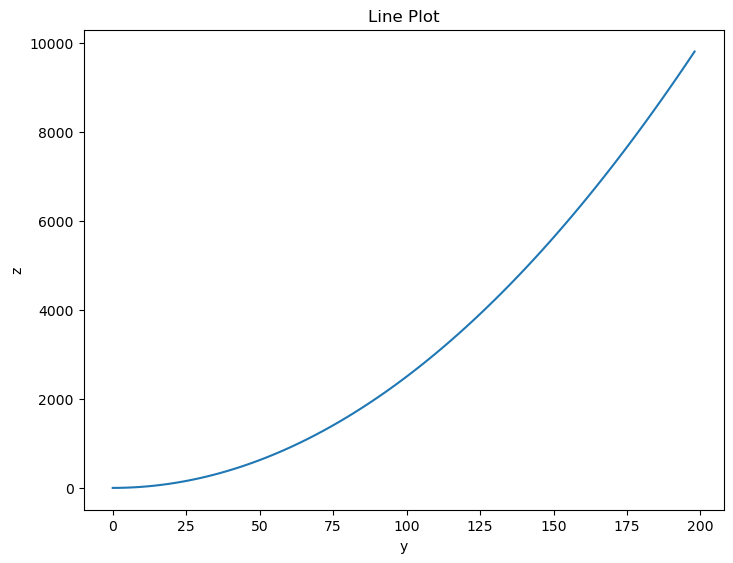

In [101]:
# a. Create a figure object and axis of the figure canvas at axis1 = [0,0,1,1]. Provide necessary labels and title to the plot.
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(y,z)
ax.set_xlabel('y')
ax.set_ylabel('z')
ax.set_title('Line Plot')
plt.show()

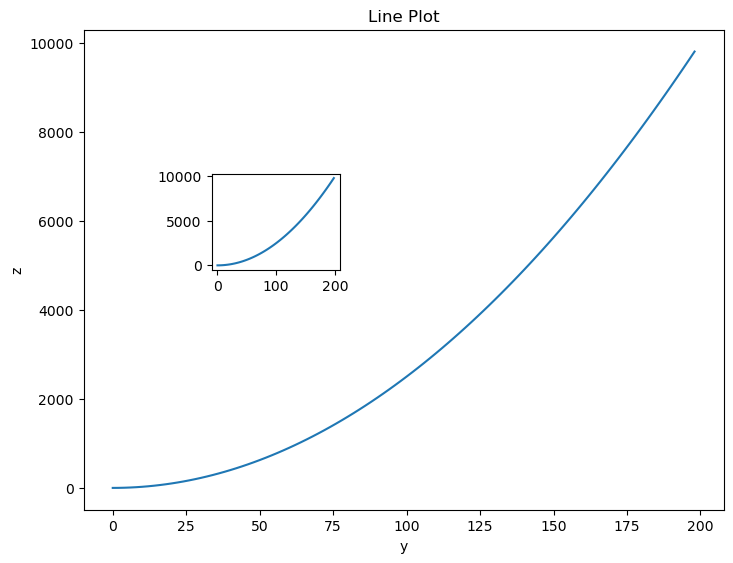

In [107]:
# Create another plot at axis1 = [0,0,1,1] and axis2 = [0.2,0.5,0.2,0.2]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(y,z)
ax.set_xlabel('y')
ax.set_ylabel('z')
ax.set_title('Line Plot')
ax2 = fig.add_axes([0.2,0.5,0.2,0.2])
ax2.plot(y,z)
plt.show()

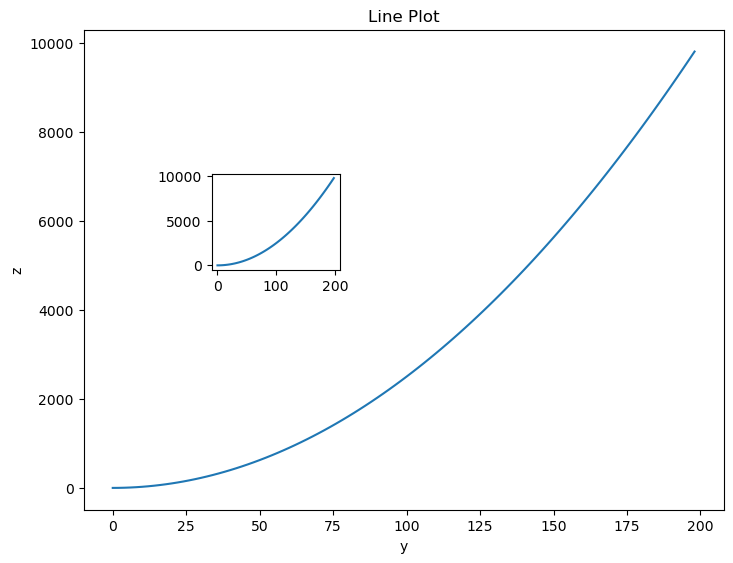

In [108]:
# Create a plot by adding two axis object at [0,0,1,1] & [0.2,0.5,0.4,0.4]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(y,z)
ax.set_xlabel('y')
ax.set_ylabel('z')
ax.set_title('Line Plot')
ax2 = fig.add_axes([0.2,0.5,0.2,0.2])
ax2.plot(y,z)
plt.show()

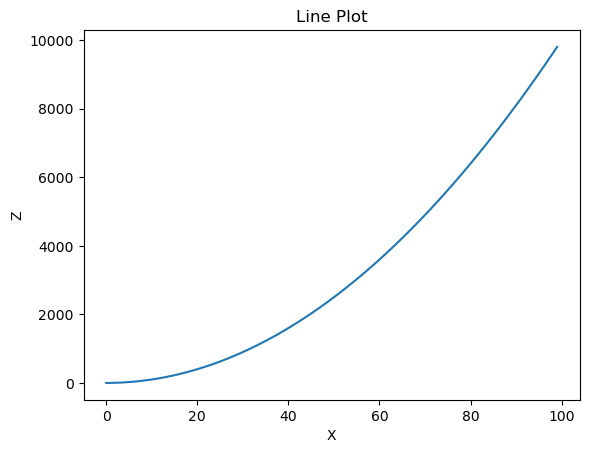

In [111]:
'''Use x, y, z array to create the plots
i. Between x and z arrays
ii. Between x & y arrays by setting the x-limit in range 20-22 and y-limit range in
30-50'''

plt.plot(x,z)
plt.xlabel("X")
plt.ylabel('Z')
plt.title('Line Plot')
plt.show()

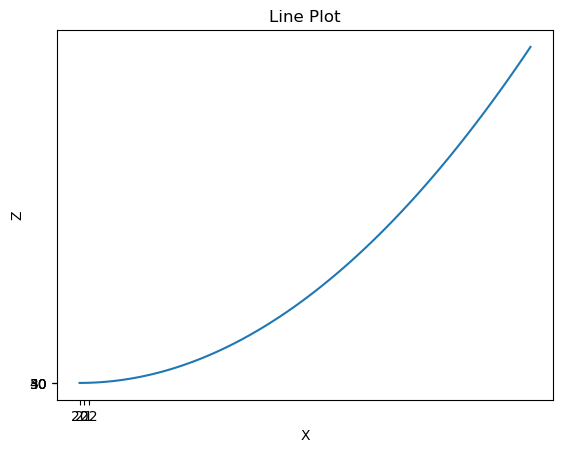

In [119]:
yticklabs = [30, 40, 50]
xticklabs = [20,21,22]
plt.plot(x,z)
plt.xlabel("X")
plt.ylabel('Z')
plt.title('Line Plot')

plt.xticks(range(3), xticklabs)
plt.yticks(range(3),yticklabs)
plt.show()

In [9]:
import numpy as np
x = list(range(3,0,-1))

In [10]:
x

[3, 2, 1]